In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_train = x_train[0:15000]

In [3]:
from keras.callbacks import TensorBoard

history = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 42s 3ms/step - loss: 0.2865 - val_loss: 0.2114
Epoch 2/20
15000/15000 [==============================] - 61s 4ms/step - loss: 0.1994 - val_loss: 0.1849
Epoch 3/20
15000/15000 [==============================] - 87s 6ms/step - loss: 0.1820 - val_loss: 0.1724
Epoch 4/20
15000/15000 [==============================] - 85s 6ms/step - loss: 0.1711 - val_loss: 0.1653
Epoch 5/20
15000/15000 [==============================] - 88s 6ms/step - loss: 0.1631 - val_loss: 0.1667
Epoch 6/20
15000/15000 [==============================] - 95s 6ms/step - loss: 0.1560 - val_loss: 0.1508
Epoch 7/20
15000/15000 [==============================] - 77s 5ms/step - loss: 0.1509 - val_loss: 0.1526
Epoch 8/20
15000/15000 [==============================] - 75s 5ms/step - loss: 0.1459 - val_loss: 0.1425
Epoch 9/20
15000/15000 [==============================] - 77s 5ms/step - loss: 0.1431 - val_loss: 0.1460
Epoch

[0, 20, 0.09, 0.3]

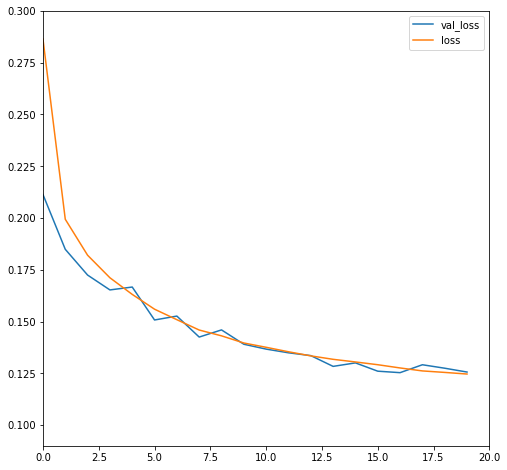

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 8))
plt.axis([0, 20, 0.09, 0.3])